# <span style="text-decoration: underline">AOS 51 Lab: Data Analysis for Climate Science Session #2</span>
# <span>🌎🔥 👩🏿‍💻👩🏾‍💻 👨🏽‍💻👩🏼‍💻 👨🏼‍💻👨🏾‍💻👩🏽‍💻 👨🏿‍💻</span>

#### In the first lab session, we learned about one-dimensional time series of climate data. These took the form of lists, Numpy arrays, or Pandas Series.

#### Today, we'll extend our data analysis skills to examine two-dimensional datasets. We'll work entirely within Pandas and learn how powerful it can be when working with text or comma-separated-value (CSV) files.
---

In [40]:
# importing Pandas and Matplotlib for today's lab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating DataFrames

Recall that a Pandas Series is simply a 1D time series of data point with a labelled index. 

Oftentimes, we'll be working with time series of multiple variables (for instance, precipitation and temperature), and for that, we'll want to use a "DataFrame".

Let's create a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) using three Series of monthly mean, max, and min temperatures over LA spanning during 2017:

In [2]:
tavg = pd.Series([55.8, 57.2, 61.0, 63.6, 63.3, 66.7, 71.7, 72.0, 71.5, 71.5, 65.6, 61.4])
tmax = pd.Series([62.7, 62.6, 69.3, 71.9, 69.4, 72.6, 77.5, 77.3, 78.5, 80.4, 73.7, 72.4])
tmin = pd.Series([48.8, 51.8, 52.8, 55.4, 57.1, 60.9, 65.8, 66.8, 64.6, 62.5, 57.3, 50.3])

DataFrames are usually abbreviated as "df".

An empty DataFrame is initialized with:

In [3]:
df = pd.DataFrame()

We can populate data into the DataFrame using the syntax:

`df[Column Name] = Column Data`

where:
   * `Column Name` is the user-specified name of the column
   * `Column Data` is the Series (OR list OR 1D numpy array) of data for that column

Let's assign the `tavg` Series a column name of "TAVG" and input that data into the DataFrame.

In [4]:
df['TAVG'] = tavg
df # print(df) also works, but loses the fancy row coloring

,TAVG
0,55.8
1,57.2
2,61.0
3,63.6
4,63.3
5,66.7
6,71.7
7,72.0
8,71.5
9,71.5


---
<span style="color:red; font-size:20px; font-weight:bold">In-class exercise </span>

Add two new columns of data to `df` above:
   * `TMIN` - 2017 monthly min temperatures over LA
   * `TMAX` - 2017 monthly max temperatures over LA

Then print the `df` to confirm that it has three columns of data.

---

In [5]:
df['TMIN'] = tmin
df['TMAX'] = tmax
df

,TAVG,TMIN,TMAX
0,55.8,48.8,62.7
1,57.2,51.8,62.6
2,61.0,52.8,69.3
3,63.6,55.4,71.9
4,63.3,57.1,69.4
5,66.7,60.9,72.6
6,71.7,65.8,77.5
7,72.0,66.8,77.3
8,71.5,64.6,78.5
9,71.5,62.5,80.4


# DatetimeIndex for DataFrames 🕰

Just as we did for Series, we can modify the Index to be a range of dates using the [pd.date_range](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html) function and then assign the DataFrame Index to those dates.

Let's create a date range of months in 2017:

In [6]:
dates = pd.date_range(start='2017-01-01', end='2017-12-01', freq='MS')
print(dates)

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', freq='MS')


Now we can reset the Index of `df` to `dates` with:

In [7]:
df.index = dates
df

,TAVG,TMIN,TMAX
2017-01-01,55.8,48.8,62.7
2017-02-01,57.2,51.8,62.6
2017-03-01,61.0,52.8,69.3
2017-04-01,63.6,55.4,71.9
2017-05-01,63.3,57.1,69.4
2017-06-01,66.7,60.9,72.6
2017-07-01,71.7,65.8,77.5
2017-08-01,72.0,66.8,77.3
2017-09-01,71.5,64.6,78.5
2017-10-01,71.5,62.5,80.4


# Viewing and Summarizing DataFrames 🕵

With `head` and `tail`, we can quick view N number of rows from the start (head) or end (tail) of a DataFrame:

In [8]:
df.head(1) # first row

,TAVG,TMIN,TMAX
2017-01-01,55.8,48.8,62.7


In [9]:
df.head(4) # first 4 rows

,TAVG,TMIN,TMAX
2017-01-01,55.8,48.8,62.7
2017-02-01,57.2,51.8,62.6
2017-03-01,61.0,52.8,69.3
2017-04-01,63.6,55.4,71.9


In [10]:
df.tail(1) # the last row

,TAVG,TMIN,TMAX
2017-12-01,61.4,50.3,72.4


In [11]:
df.tail(3) # the last 3 rows

,TAVG,TMIN,TMAX
2017-10-01,71.5,62.5,80.4
2017-11-01,65.6,57.3,73.7
2017-12-01,61.4,50.3,72.4


**We can also get a statistical summary of the DataFrame using `describe`**

In [12]:
df.describe() # the count, mean, standard dev., min, max, and quartiles of each column

,TAVG,TMIN,TMAX
count,12.000000,12.000000,12.000000
mean,65.108333,57.841667,72.358333
std,5.727042,6.235304,5.736083
min,55.800000,48.800000,62.600000
25%,61.300000,52.550000,69.375000
50%,64.600000,57.200000,72.500000
75%,71.500000,63.025000,77.350000
max,72.000000,66.800000,80.400000


---
<span style="color:red; font-size:20px; font-weight:bold">In-class exercise </span>

Below are two lists of 2006 - 2015 annual average temperature and rainfall.

Instructions:

1. Create a new DataFrame called `sample_df` containing the temperature and rainfall data as columns and a DatetimeIndex of years spanning 2006 through 2015. 
2. Print a statistical summary of the `sample_df`.

In [13]:
# 2006 - 2015 sample temperature (degrees F) and rainfall (inches) data
sample_t = [45.5, 48.9, 51.2, 47,2, 44.4, 44.1, 40.0, 52.3, 50.6]
sample_p = [9.2, 10.3, 12.2, 7.2, 13.1, 9.0, 4.8, 5.2, 8.7, 8.1]

In [14]:
sample_df = pd.DataFrame()
sample_df['T'] = sample_t
sample_df['P'] = sample_p
sample_df.index = pd.date_range(start='2006', end='2015', freq='AS')
print(sample_df)
print(sample_df.describe())

               T     P
2006-01-01  45.5   9.2
2007-01-01  48.9  10.3
2008-01-01  51.2  12.2
2009-01-01  47.0   7.2
2010-01-01   2.0  13.1
2011-01-01  44.4   9.0
2012-01-01  44.1   4.8
2013-01-01  40.0   5.2
2014-01-01  52.3   8.7
2015-01-01  50.6   8.1
               T          P
count  10.000000  10.000000
mean   42.600000   8.780000
std    14.757747   2.677395
min     2.000000   4.800000
25%    44.175000   7.425000
50%    46.250000   8.850000
75%    50.175000  10.025000
max    52.300000  13.100000


# Slicing DataFrames 🔪

We will frequently want to only work with a subset of an entire DataFrame. 

Let's learn how to:

  1. Extract entire columns of data from a DataFrame
  2. Slice various rows and columns of data inside a DataFrame

**1. Extracting individual columns of data**

Recall that the code for inserting a column of data in a DataFrame is:

`df[Column Name] = Column of Data`

The reverse of that command will extract a column of data from the DataFrame:

`Column of Data = df[Column Name]`

In [15]:
# Extracting TMIN from the df
tmin = df['TMIN']
print(tmin)

2017-01-01    48.8
2017-02-01    51.8
2017-03-01    52.8
2017-04-01    55.4
2017-05-01    57.1
2017-06-01    60.9
2017-07-01    65.8
2017-08-01    66.8
2017-09-01    64.6
2017-10-01    62.5
2017-11-01    57.3
2017-12-01    50.3
Freq: MS, Name: TMIN, dtype: float64


**2. Slicing rows/columns inside a DataFrame**

The general syntax to slice by row/column location ("loc") is:

`df.loc[row_selection, column_selection]`

Row and column selections can be:

   * a single value, e.g. '2017-01-01' or 'TMAX' 
   * a list of values, e.g. ['2017-01-01', '2017-01-02'] or ['TMAX', 'TMIN']
   * a range of values, e.g. ['2017-01-01':'2017-01-10']
   
Let's demonstate with examples on `df`:

In [16]:
# Slice a single row of 2017-05
df.loc['2017-05']

,TAVG,TMIN,TMAX
2017-05-01,63.3,57.1,69.4


In [17]:
# Slice a single row of 2017-01-01 and TAVG (brackets around TAVG are optional, try without!)
df.loc['2017-01-01', ['TAVG']]

TAVG    55.8
Name: 2017-01-01 00:00:00, dtype: float64

In [18]:
# slice two non-consecutive rows of 2017-01 and 2017-05
df.loc[['2017-01', '2017-05']]

KeyError: "None of [['2017-01', '2017-05']] are in the [index]"

Uh oh...what happened?! 

Sometimes, when you tell Pandas to search for a list of items that are strings (like '2017-05-01'), it does not know to convert them to Pandas Timestamps and search for those Timestamps in the Index. 

So, we need to convert these dates from a string to a Pandas [Timestamp](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Timestamp.html). 

In [19]:
# slice two non-consecutive rows of 2017-01 and 2017-05
df.loc[[pd.Timestamp('2017-01'), pd.Timestamp('2017-05')]]

,TAVG,TMIN,TMAX
2017-01-01,55.8,48.8,62.7
2017-05-01,63.3,57.1,69.4


**Voila!**

In [20]:
# Slice a range of months from 2017-01-01 to 2017-05-01 for TMIN and TMAX
df.loc['2017-01':'2017-05', ['TMIN', 'TMAX']]

,TMIN,TMAX
2017-01-01,48.8,62.7
2017-02-01,51.8,62.6
2017-03-01,52.8,69.3
2017-04-01,55.4,71.9
2017-05-01,57.1,69.4


---
<span style="color:red; font-size:20px; font-weight:bold">In-class exercise </span>

1. Slice row 2017-08 and column TMAX
2. Slice the range of rows 2017-05 through 2017-10 and columns TAVG and TMIN
3. Slice rows 2017-03 and 2017-08 and column TMIN
---

In [21]:
#df.loc['2017-08', ['TMAX']] # brackets around 'TMAX' are optional 
#df.loc['2017-05':'2017-10', ['TAVG', 'TMAX']]
#df.loc[[pd.Timestamp('2017-03'), pd.Timestamp('2017-08')], ['TMIN']] # brackets around 'TMIN' are optional

# Plotting DataFrames

Just as we did with Pandas Series, we can plot Pandas DataFrames using:

```
[Name of DataFrame].plot(kind = [type of plot],
                         color = [list of colors for each column]
                         title = [title of plot]
```                          

For instance, let's plot TAVG, TMAX, and TMIN from our `df`:

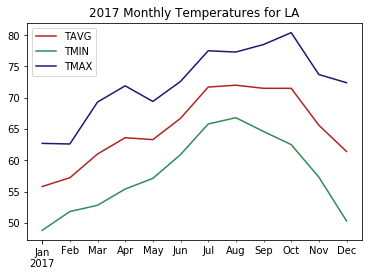

In [22]:
df.plot(kind='line',
       color=['firebrick', 'seagreen', 'midnightblue'],
       title='2017 Monthly Temperatures for LA')

---
<span style="color:red; font-size:20px; font-weight:bold">In-class exercise </span>

Below are three lists containing monthly average precipitation (unit: inches) during 2017 for three US cities - San Diego, Miami, and Detroit. 

1. Create a new DataFrame called `pr_df` storing three columns of precipitation data (named `SD`, `MIA`, and `DET`) and a DatetimeIndex ranging from 01/2017 through 12/2017.
2. Create a bar plot (`kind='bar'`) to see how precipitation varied across each city during this year.

In [23]:
sd_precip = [3.02, 3.71, 0.08, 0.01, 0.92, 0.02, 0.00, 0.00, 0.08, 0.00, 0.02, 0.07]
mia_precip = [3.41, 1.31, 3.92, 2.16, 2.69, 15.97, 12.45, 8.57, 14.97, 12.61, 4.41, 0.66]
det_precip = [2.84, 1.91, 4.26, 3.55, 4.38, 2.03, 2.44, 3.91, 0.91, 2.84, 4.93, 1.49]

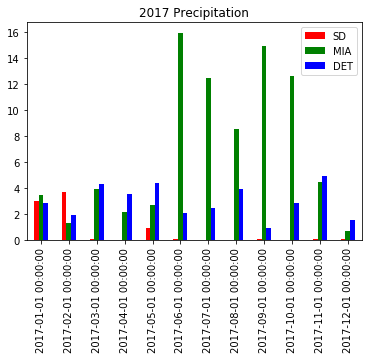

In [24]:
# Create the DataFrame
pr_df = pd.DataFrame()
pr_df['SD'] = sd_precip
pr_df['MIA'] = mia_precip
pr_df['DET'] = det_precip
pr_df.index = pd.date_range(start='2017-01', end='2017-12', freq='MS')

# Plot the DataFrame
# We'll fix the x-axis labels next
pr_df.plot(kind='bar',
          color=['red', 'green', 'blue'],
          title='2017 Precipitation')

# Blending Matplotlib and Pandas Plotting

We can improve our Pandas-based plot using regular matplotlib commands.  

I'll demonstate an example below that modified the bar chart we just created in the last in-class exercise. 

In a later lab, we'll dive deeper into Matpotlib to fully understand what's going on here.

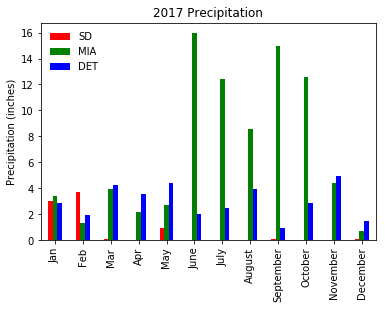

In [25]:
# Bar plot created using Pandas
pr_df.plot(kind='bar',
          color=['red', 'green', 'blue'],
          title='2017 Precipitation')

# Modifications created using Matplotlib
xtick_locations = range(12) # 0, 1,..., 11
xtick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'August',
               'September', 'October', 'November', 'December']


plt.ylabel('Precipitation (inches)')
plt.xticks(xtick_locations, xtick_labels)
plt.legend(loc='upper left', frameon=False)

# DataFrame Statistics 

Recall that standard statistics (like mean, min, max) on Series were found with, for example:

In [26]:
sample_series = pd.Series([12.1, 10.9, 5.5, 3.2, 7,5])
series_mean = sample_series.mean()
print(series_mean)

7.283333333333334


Similarly, we can compute standard statistics on DataFrames with only one extra bit of information -  we need to specify whether that statistic should be performed along the row-axis or the column-axis.

Axes are numbered 0 or 1, with **axis=0 for calculations across rows** and **axis=1 for calculations across columns.** 

Let's demonstrate on `df`, first recalling what this DataFrame looks like:

In [27]:
df

,TAVG,TMIN,TMAX
2017-01-01,55.8,48.8,62.7
2017-02-01,57.2,51.8,62.6
2017-03-01,61.0,52.8,69.3
2017-04-01,63.6,55.4,71.9
2017-05-01,63.3,57.1,69.4
2017-06-01,66.7,60.9,72.6
2017-07-01,71.7,65.8,77.5
2017-08-01,72.0,66.8,77.3
2017-09-01,71.5,64.6,78.5
2017-10-01,71.5,62.5,80.4


In [28]:
# Maximums across rows (or max value per column)
df.max(axis=0)

TAVG    72.0
TMIN    66.8
TMAX    80.4
dtype: float64

In [29]:
# Minimums across columns (this just equals the TMIN column!)
df.min(axis=1)

2017-01-01    48.8
2017-02-01    51.8
2017-03-01    52.8
2017-04-01    55.4
2017-05-01    57.1
2017-06-01    60.9
2017-07-01    65.8
2017-08-01    66.8
2017-09-01    64.6
2017-10-01    62.5
2017-11-01    57.3
2017-12-01    50.3
Freq: MS, dtype: float64

In [30]:
# Mean of TMAX across the first 6 months 
# "Chaining" or linking slicing and statistics together! 
df.loc['2017-01':'2017-06', 'TMAX'].mean(axis=0)

68.08333333333333

---
<span style="color:red; font-size:20px; font-weight:bold">In-class exercise </span>

Using `df`, compute the following:

1. Average monthly minimum temperature during the summmer (June, July, and August)
2. Average monthly minimum and maximum temperature during the fall (September, October, November)

In [31]:
avg_min_jja = df.loc['2017-06':'2017-08', 'TMIN'].mean(axis=0)
avg_min_max_son = df.loc['2017-09':'2017-11', ['TMIN', 'TMAX']].mean(axis=0)

# Reading external data files

Most commonly, we will be using Pandas to load external data files (e.g. text, csv, Excel) for further analyses. 

Pandas can read/write a [wide range of file types](https://pandas.pydata.org/pandas-docs/stable/io.html), but for our purposes, we'll stick with comma-separate-value or CSV files.

CSV files are simply text files where each data point in a row is separated by a comma. For instance:

```
Date,Value1,Value2,Value3
2018-01,12,23,45
2018-02,19,21,23
2018-03,17,19,31
```

We are going to start working with a file called `slr_rcp85_la.csv`, which should be located in the /data/ sub-directory in your AOS51 directory. 

This file shows fraction (0 to 1) of hours in a year that the sea level off the coast of LA exceeds approximately 5 feet. The future projections are based on a business-as-usual greenhouse gas emissions scenario called RCP8.5. 

We can read in the file and assign it to a new DataFrame called `slr` with:

In [32]:
# Replace nberg with your name below!
slr_df = pd.read_csv('/Users/nberg/AOS51/data/slr_rcp85_la.csv', sep=',')

We supply the `pd.read_csv()` command with at least two-arguments: the path to the csv file and then what kind of seperator (sep) exists between each data point. In this case, it's a comma `,`, but it could be a space, a tab, etc. 

Let's view `slr_df` to see what we are working with:

In [33]:
slr_df

,year,slr
0,2000,0.000000
1,2001,0.000000
2,2002,0.000114
3,2003,0.000342
4,2004,0.000000
5,2005,0.000000
6,2006,0.000000
7,2007,0.000000
8,2008,0.000000
9,2009,0.000342


OK, the data all seems to be there, but we want `year` to be our index, not numbers going from 0 to 99.

For that, we need to specify during the read-in procedure which column (as an integer starting with 0) to use as our index:

In [34]:
slr_df = pd.read_csv('/Users/nberg/AOS51/data/slr_rcp85_la.csv', sep=',', index_col=0)
slr_df.head(5)

,slr
year,
2000,0.000000
2001,0.000000
2002,0.000114
2003,0.000342
2004,0.000000


Nice! One more thing:

Since we are working with dates as our index, we want to transform the index to be a true DatetimeIndex so that we can resample it, for instance. 

For that we need to tell Pandas to parse the dates in the index:

In [35]:
slr_df = pd.read_csv('/Users/nberg/AOS51/data/slr_rcp85_la.csv', sep=',', index_col=0, parse_dates=True)
slr_df

,slr
year,
2000-01-01,0.000000
2001-01-01,0.000000
2002-01-01,0.000114
2003-01-01,0.000342
2004-01-01,0.000000
2005-01-01,0.000000
2006-01-01,0.000000
2007-01-01,0.000000
2008-01-01,0.000000


Let's quickly visualize this data set to see what future sea levels could look like over LA! 

(-0.1, 1.1)

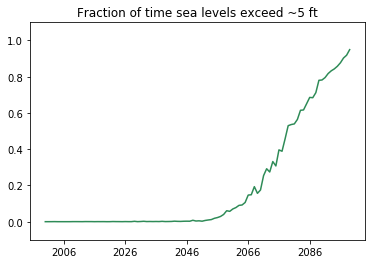

In [36]:
years = slr_df.index;
sea_levels = slr_df['slr']

plt.plot(years, sea_levels, color='seagreen')
plt.title('Fraction of time sea levels exceed ~5 ft')
plt.ylim(-0.1,1.1)

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise </span>

Open the file `extreme_heat_days_rcp85_tasmax.csv` in Excel (or on the command line with `>>> cat extreme_heat_days_rcp85_tasmax.csv`.

Generate a new DataFrame called `extreme_heat` by reading in the file called `extreme_heat_days_rcp85_tasmax.csv`.

Make sure you tell Pandas which column to use as the index and to parse those dates. 